In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score, classification_report, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('../data/PPMI_sncRNAcounts/counts/ML.csv')
sig_transcripts = pd.read_csv('../data/PPMI_sncRNAcounts/counts/sig_transcripts_df_v2.csv')

In [3]:
df = df[['PATNO', 'COHORT'] + sig_transcripts['transcript'].tolist()]

In [4]:
X = df.drop(['PATNO', 'COHORT'], axis=1)
y = df['COHORT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=1)
model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=1, n_estimators=200)

In [8]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'f1: {f1}')
print(f'confusion matrix:\n{confusion}')
print(f'classification report:\n{report}')

accuracy: 0.5497630331753555
precision: 0.5147969428721181
f1: 0.5222650427656019
confusion matrix:
[[87 12 19]
 [30  3  1]
 [32  1 26]]
classification report:
              precision    recall  f1-score   support

         1.0       0.58      0.74      0.65       118
         2.0       0.19      0.09      0.12        34
         4.0       0.57      0.44      0.50        59

    accuracy                           0.55       211
   macro avg       0.45      0.42      0.42       211
weighted avg       0.51      0.55      0.52       211



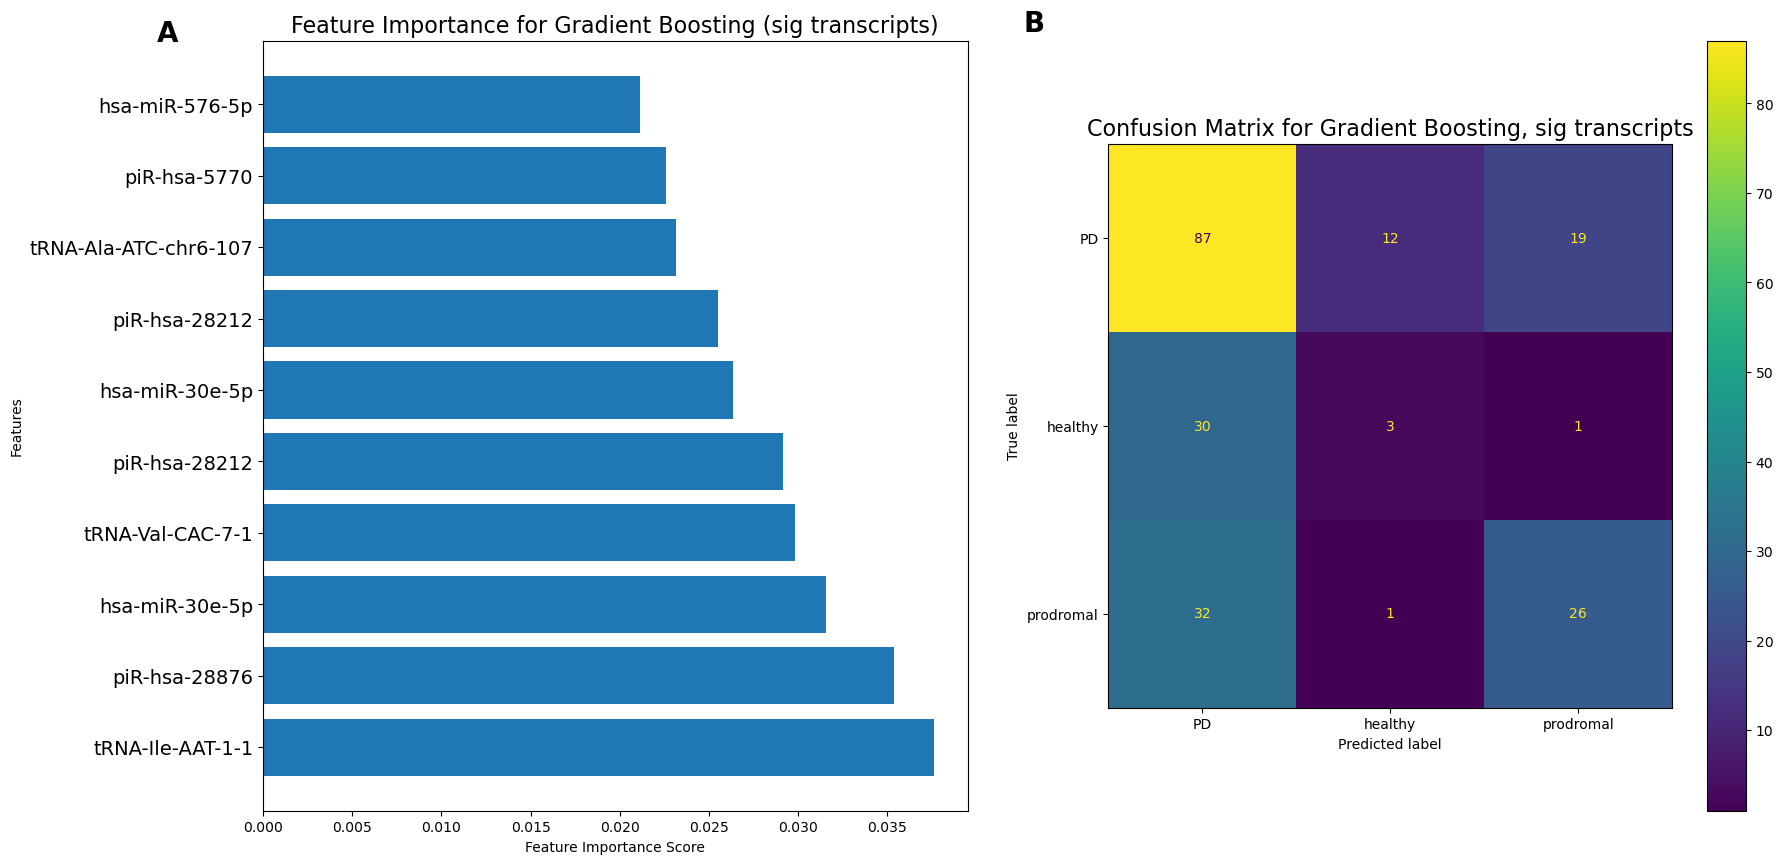

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
feature_scores = model.feature_importances_
top_idx = np.argsort(feature_scores)[::-1][:10]
top_feature_names = X.columns[top_idx]
ax1.barh(range(len(top_idx)), feature_scores[top_idx], align='center')
ax1.set_yticks(range(len(top_idx)), top_feature_names, fontsize=14)
ax1.set_xlabel('Feature Importance Score')
ax1.set_ylabel('Features')
ax1.set_title('Feature Importance for Gradient Boosting (sig transcripts)', fontsize=16)
ax1.text(-0.15, 1, 'A', transform=ax1.transAxes, size=20, weight='bold')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=['PD', 'healthy', 'prodromal'])
disp.plot(ax=ax2)
ax2.set_title('Confusion Matrix for Gradient Boosting, sig transcripts', fontsize=16)
ax2.text(-0.15, 1.2, 'B', transform=ax2.transAxes, size=20, weight='bold')
plt.savefig('../figures/sig_feature_importance_confusion_matrix_gradientboost.png', dpi=300, bbox_inches='tight')
plt.show()